<a href="https://colab.research.google.com/github/amanjain487/panoptic-segmentation-using-DETR/blob/main/Train_Bounding_Box_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model for Object Detection

## Get CUDA Device Properties

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image
print(torch.cuda.get_device_properties(0))


_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Mount Drive
- To continue training from last checkpoint
- To save model after every epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Install Required Libraries/Packages

In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-8oa18dpe
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-8oa18dpe
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=333ff82a0531d3b86c7c92c4b0e2d6f90469c651868cd8d4cfe4cb9a4e07cc46
  Stored in directory: /tmp/pip-ephem-wheel-cache-p1se6cvh/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# Train Box Model

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

!python main.py --coco_path ../data/  --coco_panoptic_path ../data/ --dataset_file coco_panoptic --output_dir "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model"  --epoch 500 --batch_size 2 --resume "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model/checkpoint.pth"

Streaming output truncated to the last 5000 lines.
Epoch: [492]  [ 250/5065]  eta: 0:18:32  lr: 0.000100  class_error: 0.00  loss: 2.9366 (3.4323)  loss_ce: 0.0358 (0.1929)  loss_bbox: 0.1403 (0.1811)  loss_giou: 0.1581 (0.1696)  loss_ce_0: 0.0658 (0.2377)  loss_bbox_0: 0.1973 (0.2124)  loss_giou_0: 0.1986 (0.1922)  loss_ce_1: 0.0460 (0.2197)  loss_bbox_1: 0.1366 (0.1913)  loss_giou_1: 0.1505 (0.1753)  loss_ce_2: 0.0500 (0.1997)  loss_bbox_2: 0.1475 (0.1860)  loss_giou_2: 0.1752 (0.1744)  loss_ce_3: 0.0392 (0.1999)  loss_bbox_3: 0.1420 (0.1831)  loss_giou_3: 0.1623 (0.1688)  loss_ce_4: 0.0396 (0.1996)  loss_bbox_4: 0.1275 (0.1817)  loss_giou_4: 0.1574 (0.1668)  loss_ce_unscaled: 0.0358 (0.1929)  class_error_unscaled: 0.0000 (6.0082)  loss_bbox_unscaled: 0.0281 (0.0362)  loss_giou_unscaled: 0.0791 (0.0848)  cardinality_error_unscaled: 0.0000 (0.9960)  loss_ce_0_unscaled: 0.0658 (0.2377)  loss_bbox_0_unscaled: 0.0395 (0.0425)  loss_giou_0_unscaled: 0.0993 (0.0961)  cardinality_error_0_un

In [ ]:
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('output/box_model/')]

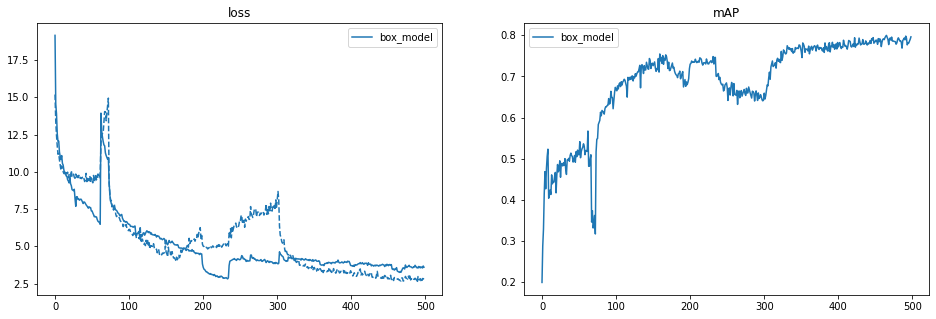

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

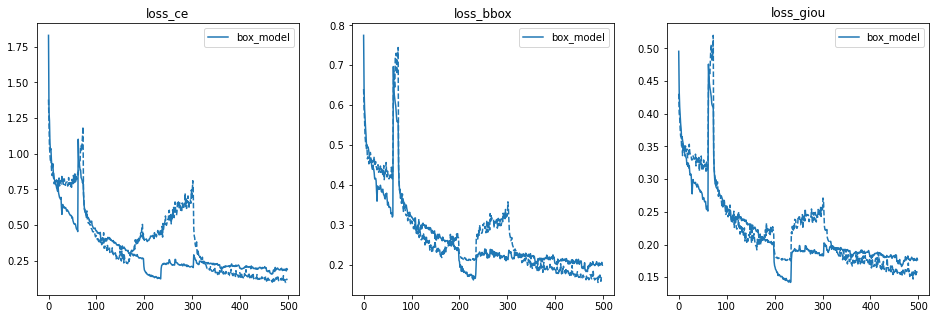

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )
 
plot_logs(log_directory,
          fields_of_interest)

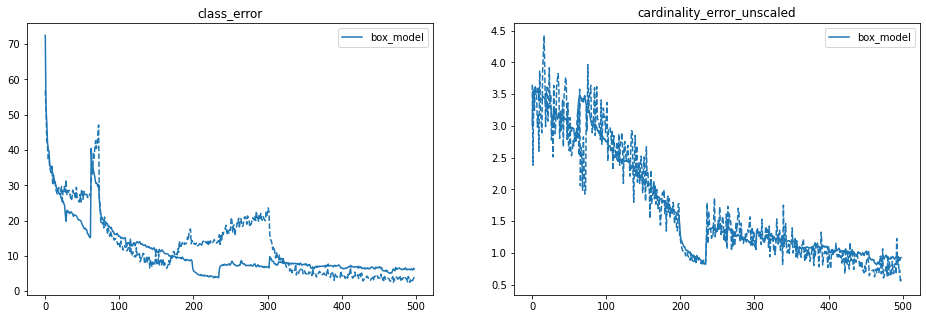

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   